In [1]:
#import modules
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.classification import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("eagro").getOrCreate()

In [5]:
data = spark.read.csv('Crop_recommendation.csv',inferSchema=True,header=True)

In [6]:
data.show()

+---+---+---+-----------+-----------------+------------------+------------------+-----+
|  N|  P|  K|temperature|         humidity|                ph|          rainfall|label|
+---+---+---+-----------+-----------------+------------------+------------------+-----+
| 90| 42| 43|20.87974371|      82.00274423| 6.502985292000001|       202.9355362| rice|
| 85| 58| 41|21.77046169|      80.31964408|       7.038096361|       226.6555374| rice|
| 60| 55| 44|23.00445915|       82.3207629|       7.840207144|       263.9642476| rice|
| 74| 35| 40|26.49109635|      80.15836264|       6.980400905|       242.8640342| rice|
| 78| 42| 42|20.13017482|      81.60487287|       7.628472891|       262.7173405| rice|
| 69| 37| 42|23.05804872|      83.37011772|       7.073453503|       251.0549998| rice|
| 69| 55| 38|22.70883798|      82.63941394|        5.70080568|       271.3248604| rice|
| 94| 53| 40|20.27774362|      82.89408619| 5.718627177999999|       241.9741949| rice|
| 89| 54| 38|24.51588066|83.5352

In [12]:
data.groupBy("label").count().show()

+-----------+-----+
|      label|count|
+-----------+-----+
|   chickpea|  100|
|   mungbean|  100|
|     orange|  100|
|     papaya|  100|
| pigeonpeas|  100|
|     cotton|  100|
|      apple|  100|
|      mango|  100|
|       jute|  100|
|     grapes|  100|
|      maize|  100|
|pomegranate|  100|
|  mothbeans|  100|
|     banana|  100|
|    coconut|  100|
|  muskmelon|  100|
|kidneybeans|  100|
|       rice|  100|
|     coffee|  100|
|  blackgram|  100|
+-----------+-----+
only showing top 20 rows



In [23]:
data.createOrReplaceTempView('data')

In [29]:
from pyspark.sql.functions import isnull, when, count, col
nacounts = data.select([count(when(isnull(c), c)).alias(c) for c in data.columns]).toPandas()
nacounts

,N,P,K,temperature,humidity,ph,rainfall,label
0,0,0,0,0,0,0,0,0


In [43]:
x = data.select('N').toPandas()

<AxesSubplot:ylabel='Density'>

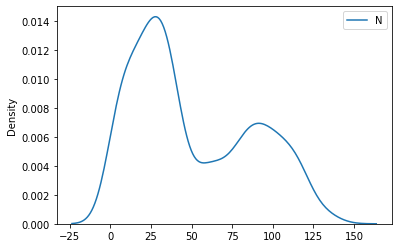

In [42]:
import numpy as np
sns.kdeplot(data=x)

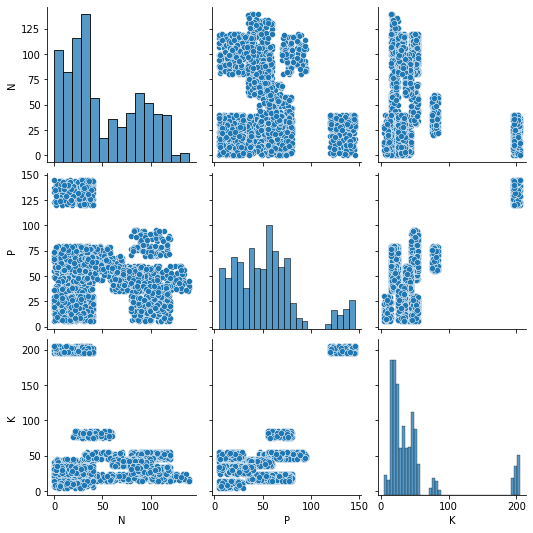

In [48]:
sns.pairplot(data=data['N','P','K'].toPandas())

In [ ]:
plt.figure(figsize=(300,300))
sns.boxplot(x='label',y='K',data=data.toPandas())

<AxesSubplot:xlabel='label', ylabel='K'>